# OilyGiant Region ML

We have data on oil samples from three regions. Parameters of each oil well in the region are already known. We will build a model that will help to pick the region with the highest profit margin and analyze potential profit and risks using the Bootstrapping technique.

## Preparing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
try:
    geo_1 = pd.read_csv('/geo_data_0.csv')
    geo_2 = pd.read_csv('/geo_data_1.csv')
    geo_3 = pd.read_csv('/geo_data_2.csv')
except:
    geo_1 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_2 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Checking Geo Data 1
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
geo_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
# Checking Geo Data 2
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
geo_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
# Checking Geo Data 3
geo_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
geo_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
# Checking for NaNs
print('Total amount of NaNs:', 
      geo_1.isna().sum().sum() + geo_2.isna().sum().sum() + geo_3.isna().sum().sum())

Total amount of NaNs: 0


In [13]:
# Dropping duplicate rows
print('Total amount of duplicates:',
      len(geo_1.drop_duplicates()) + len(geo_2.drop_duplicates()) + len(geo_3.drop_duplicates()) - len(geo_3) * 3)

Total amount of duplicates: 0


In [14]:
# Dropping useless columns
geo_1 = geo_1.drop('id', axis=1)
geo_2 = geo_2.drop('id', axis=1)
geo_3 = geo_3.drop('id', axis=1)

Our data is now usable for EDA. I decided not to combine each set into one dataset since they're each seperated as a independant region.

## Creating our Model

In [15]:
# Creating our training and testing sets
# We use GridSearchCV so a validation set isn't needed
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    geo_1.drop(['product'], axis=1), geo_1['product'], train_size=0.9, random_state=12345)

features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    geo_2.drop(['product'], axis=1), geo_2['product'], train_size=0.9, random_state=12345)

features_train_3, features_test_3, target_train_3, target_test_3 = train_test_split(
    geo_3.drop(['product'], axis=1), geo_1['product'], train_size=0.9, random_state=12345)

# Checking train and test shapes for errors
print('Training set 1 shapes:', features_train_1.shape, target_train_1.shape)
print('Training set 2 shapes:', features_train_2.shape, target_train_2.shape)
print('Training set 3 shapes:', features_train_3.shape, target_train_3.shape)
print()
print('Test set 1 shapes:', features_test_1.shape, target_test_1.shape)
print('Test set 2 shapes:', features_test_2.shape, target_test_2.shape)
print('Test set 3 shapes:', features_test_3.shape, target_test_3.shape)

Training set 1 shapes: (90000, 3) (90000,)
Training set 2 shapes: (90000, 3) (90000,)
Training set 3 shapes: (90000, 3) (90000,)

Test set 1 shapes: (10000, 3) (10000,)
Test set 2 shapes: (10000, 3) (10000,)
Test set 3 shapes: (10000, 3) (10000,)


In [16]:
# Creating a Linear Regression model for Geo 1 with GridSearchCV
param_grid = {}

lr1 = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=4)
lr1.fit(features_train_1, target_train_1)
lr1_predict_test = lr1.predict(features_test_1)

print('Geo 1')
print('RMSE:', round(sqrt(mean_squared_error(target_test_1, lr1_predict_test)), 2))
print('Average Reserves:', round(lr1_predict_test.mean(), 2))
print()

Geo 1
RMSE: 37.58
Average Reserves: 92.66



In [17]:
# Creating a Linear Regression model for Geo 2 with GridSearchCV
param_grid = {}

lr2 = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=4)
lr2.fit(features_train_2, target_train_2)
lr2_predict_test = lr2.predict(features_test_2)

print('Geo 2')
print('RMSE:', round(sqrt(mean_squared_error(target_test_2, lr2_predict_test)), 2))
print('Average Reserves:', round(lr2_predict_test.mean(), 2))
print()

Geo 2
RMSE: 0.9
Average Reserves: 68.98



In [18]:
# Creating a Linear Regression model for Geo 3 with GridSearchCV
param_grid = {}

lr3 = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=4)
lr3.fit(features_train_3, target_train_3)
lr3_predict_test = lr3.predict(features_test_3)

print('Geo 3')
print('RMSE:', round(sqrt(mean_squared_error(target_test_3, lr3_predict_test)), 2))
print('Average Reserves:', round(lr3_predict_test.mean(), 2))
print()

Geo 3
RMSE: 44.28
Average Reserves: 92.58



In [19]:
# Creating dataframe for our predictions and correct answers
predicted_df_1 = pd.DataFrame(target_test_1)
predicted_df_1['prediction'] = lr1_predict_test
predicted_df_1 = predicted_df_1.reset_index(drop=True)

predicted_df_2 = pd.DataFrame(target_test_2)
predicted_df_2['prediction'] = lr2_predict_test
predicted_df_2 = predicted_df_2.reset_index(drop=True)

predicted_df_3 = pd.DataFrame(target_test_3)
predicted_df_3['prediction'] = lr3_predict_test
predicted_df_3= predicted_df_3.reset_index(drop=True)

## Profit Calculations

In [20]:
# Budget for delevopment
DEV_BUDGET = 100000000
# Maximum wells
WELL_BUDGET = 200 
# Cost per barrel
BARREL_COST = 4.5
# Reverse of Barrels
RESERVE = 1000
# Max risk per loss
RISK = 0.025

# Cost of goods
COST_OF_GOODS = DEV_BUDGET / WELL_BUDGET
# Reserve cost
UNIT_REV = BARREL_COST * RESERVE

In [21]:
# Reserves needed without losses
RESERVES_NEEDED = COST_OF_GOODS / UNIT_REV

print('Reserves needed to negate losses:', int(RESERVES_NEEDED))
print('Region 1 Mean Volume:', int(lr1_predict_test.mean()))
print('Region 2 Mean Volume:', int(lr2_predict_test.mean()))
print('Region 3 Mean Volume:', int(lr3_predict_test.mean()))

Reserves needed to negate losses: 111
Region 1 Mean Volume: 92
Region 2 Mean Volume: 68
Region 3 Mean Volume: 92


The average volume of reserves is lower than the needed amount to negate losses, however this only means the average well isn't good enough - good thing the average isn't the highest 200.

In [22]:
# Filtering for the top 200
top_predicted_1 = predicted_df_1.sort_values(by='prediction', ascending=False).head(200)
top_predicted_2 = predicted_df_2.sort_values(by='prediction', ascending=False).head(200)
top_predicted_3 = predicted_df_3.sort_values(by='prediction', ascending=False).head(200)

# Calculating profits
top_predicted_1['profit'] = top_predicted_1['prediction'] * UNIT_REV - COST_OF_GOODS
top_predicted_2['profit'] = top_predicted_2['prediction'] * UNIT_REV - COST_OF_GOODS
top_predicted_3['profit'] = top_predicted_3['prediction'] * UNIT_REV - COST_OF_GOODS

In [23]:
print('Total Expected Profit in Region 1: {:,d}'.format(int(top_predicted_1['profit'].sum())))
print('Total Expected Profit in Region 2: {:,d}'.format(int(top_predicted_2['profit'].sum())))
print('Total Expected Profit in Region 3: {:,d}'.format(int(top_predicted_3['profit'].sum())))

Total Expected Profit in Region 1: 34,018,015
Total Expected Profit in Region 2: 24,532,353
Total Expected Profit in Region 3: -16,153,604


Between our three regions, region 1 is our clear winner, making about 28% more in profit than the second most profitable region, region 2.

## Calculating Risks and Profits

In [24]:
# Def for calculating profits
def profit_calculation(well_profits, profit, amount):
    well_profits = well_profits.sort_values(by=['predicted'], ascending=False).head(amount)
    
    product_sum = well_profits['product'].sum()
    predicted_sum = well_profits['predicted'].sum()
    revenue_2 = product_sum * profit
    predicted_revenue = predicted_sum * profit
    
    profit = revenue_2 - DEV_BUDGET
    predicted_profit = predicted_revenue - DEV_BUDGET
    
    return profit, predicted_profit         

In [25]:
# Def for using bootstrap to calculate profit
def bootstrap_profit(df, amount):
    state = np.random.RandomState(12345)

    target_subsample = pd.DataFrame(columns = ['product', 'predicted'])
    highest_wells_profit = []
    
    for i in range(amount):   
        target_subsample = df.sample(n=500, replace=True, random_state=state)
        profit = profit_calculation(well_profits = target_subsample, profit = 4500, amount = 200)
        highest_wells_profit.append(profit)
    
    return pd.DataFrame(highest_wells_profit, columns = ['product', 'predicted'])

In [26]:
# Creating datatframes using target test and the region's model prediction
target_predictions_1 = pd.DataFrame(target_test_1)
target_predictions_1['predicted'] = lr1_predict_test

target_predictions_2 = pd.DataFrame(target_test_2)
target_predictions_2['predicted'] = lr2_predict_test

target_predictions_3 = pd.DataFrame(target_test_3)
target_predictions_3['predicted'] = lr3_predict_test

# Assigning the dataframes to a list
regions = [target_predictions_1, target_predictions_2, target_predictions_3]

In [27]:
# Finding bootstrap profits, average profits, confidence interval, and risk
regions_profit = []
i = 0

for dfi in regions:
    profit = bootstrap_profit(df = dfi, amount = 1000)
    
    # 95% confidence interval
    conf_low = profit.quantile(0.025)
    conf_high = profit.quantile(0.975)
    
    confidence_interval = st.t.interval(
        0.95, len(profit['product'])-1, 
        loc=profit['product'].mean(), 
        scale=st.sem(profit['product']))
    
    loss_risk = (profit['product'] < 0).mean()
    
    region_dict = {
                    'name': 'reg_'+str(i),
                    'profit_df': profit,
                    'average_profit': profit.mean(),
                    'confidence_interval': confidence_interval,
                    'loss_risk': loss_risk
                  }
    
    i += 1
    regions_profit.append(region_dict)

In [28]:
# Def for creating plots for true and predicted profit
def dist_plot(df, location, size):
    fig, axes = plt.subplots(1, 2, figsize = (size), sharey=True, sharex=True)
    
    sns.histplot(data=df['product'], ax=axes[0])
    sns.histplot(data=df['predicted'], ax=axes[1])
    
    axes[0].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[0].set(title='Region {} Distribution of True Profit'.format(location));
    axes[1].set(xlabel='Profit (in mil $)', ylabel='Frequecy');
    axes[1].set(title='Region {} Distribution of Predicted Profit'.format(location));
    
    plt.show()

Region 1


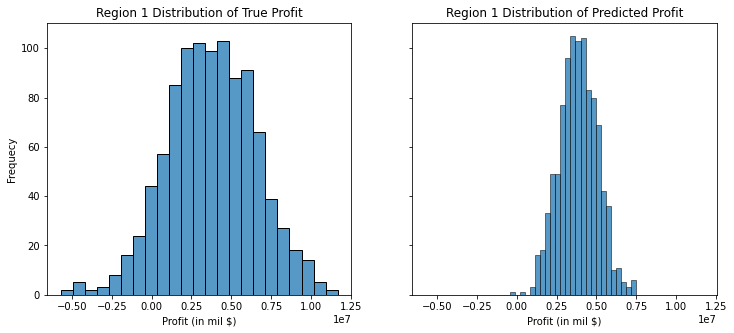

Region 2


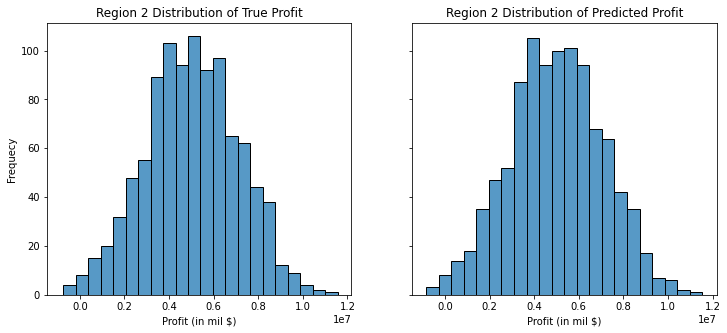

Region 3


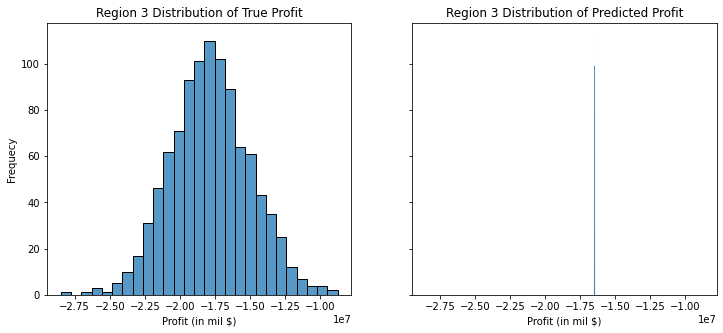

In [29]:
# Plotting our profit graphs
r = 1
for reg_dict in regions_profit:
    print('Region '+str(r))
    dist_plot(df = reg_dict['profit_df'], location = r,  size = [12, 5])
    r += 1

The distibution of true profit is about the same in all regions, whereas the distribution of predicted profit shows a much wider range for region 2, and a decreasing range of a lower amount for region 1 and even lower for region 3.

In [30]:
# Finding confidence interval
r = 1
for reg_dict in regions_profit:
    print('95% Confidence Interval Region '+str(r)+':\n Lower Bound:',
          round(reg_dict['confidence_interval'][0], 2),'\n Upper Bound:',round(reg_dict['confidence_interval'][1], 2))    
    r += 1
    print()

95% Confidence Interval Region 1:
 Lower Bound: 3595580.75 
 Upper Bound: 3938545.37

95% Confidence Interval Region 2:
 Lower Bound: 4892517.15 
 Upper Bound: 5150813.46

95% Confidence Interval Region 3:
 Lower Bound: -17980969.73 
 Upper Bound: -17629299.96



In [31]:
# Finding risk of loss for each region
r = 1
for reg_dict in regions_profit:
    print('Risk of Losses for Region '+str(r)+': {:.2%}'.format(reg_dict['loss_risk']))
    r += 1
    print()

Risk of Losses for Region 1: 8.60%

Risk of Losses for Region 2: 0.70%

Risk of Losses for Region 3: 100.00%



The highest 95% confidence interval is for Region 1, having both a higher lower and upper bound than the other two regions. Region 1 is about in the middle for risk of losses.

## Overall Conclusion

Analyzing our overall data, the only region suitable for our purposes is Region 2 as our condition for choosing a region is a risk below 2.5%. Region 2 has the lowest risk at 1.8%, a very high confidence interval, but one of the lowest expected profit amounts.

But, despite the shortcoming of expected profit, Region 2 is our only choice for our goals.